In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model

''' An example of Simple Linear Regression. Found this dataset
    here: https://online.stat.psu.edu/stat462/node/101/ Here 
    least squares regression is used. It's very popular and used
    frequently, and since there's a decent portion of math behind 
    it, it's good to learn.
    
    The website implementation is different from this one. The 
    difference is simple, the site uses the column "Brth15To17" 
    as a dependent y axis, while this uses the column "TeenBrth" as
    the y axis. So the results won't be the same since this is trying 
    to find a correlation between teen birth in general with poverty
    percent.
    
    Start with loading in the data and removing the \t or tabs from
    the text file to properly see and use the data.
 '''
data = pd.read_csv('birthratedata.txt', delimiter="\t")
data

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0
6,Connecticut,9.7,14.1,45.1,4.6,25.8
7,Delaware,10.3,24.7,77.8,3.5,46.3
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1
9,Florida,16.2,23.2,78.4,7.3,44.5


In [83]:
''' Let's graph the data, to do so, first take the data into
    separate variables. The poverty percentage would be the
    independent x axis because no matter what, the percentages
    will stay the same. 
    
    Then the teen birth will be the y since the assumption is,
    the higher the povery rate, the higher the teen birth rate. '''
xAxis = np.array(data['PovPct'])
yAxis = np.array(data['TeenBrth'])

# Print them out here for future viewing reference. 
print(f'X axis data: {xAxis}.\n\nY axis data: {yAxis}.')

X axis data: [20.1  7.1 16.1 14.9 16.7  8.8  9.7 10.3 22.  16.2 12.1 10.3 14.5 12.4
  9.6 12.2 10.8 14.7 19.7 11.2 10.1 11.  12.2  9.2 23.5  9.4 15.3  9.6
 11.1  5.3  7.8 25.3 16.5 12.6 12.  11.5 17.1 11.2 12.2 10.6 19.9 14.5
 15.5 17.4  8.4 10.3 10.2 12.5 16.7  8.5 12.2].

Y axis data: [54.5 39.5 61.2 59.9 41.1 47.  25.8 46.3 69.1 44.5 55.7 38.2 39.1 42.2
 44.6 32.5 43.  51.  58.1 25.4 35.4 23.3 34.8 27.5 64.7 44.1 36.4 37.
 53.9 20.  26.8 62.4 29.5 52.2 27.2 39.5 58.  36.8 31.6 35.6 53.  38.
 54.3 64.4 36.8 24.2 37.6 33.  45.5 32.3 39.9].


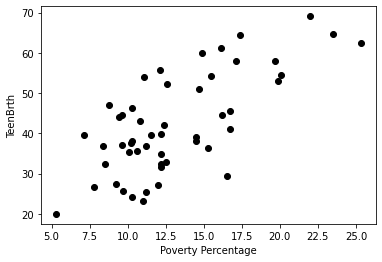

In [84]:
# Now graph to see what it looks like so far.
plt.plot(xAxis, yAxis, 'ok')
plt.xlabel('Poverty Percentage')
plt.ylabel('TeenBrth')
plt.show()

In [85]:
from statistics import mean

''' As said before to get the best possible line, using the least
    square regression (lsr) is one of the most popular methods 
    out there. It minimizes the error as much as it can and the
    smaller the error values, the better the calculations. 
    
        Formula is:
        
        m = Sum of all (x-xmean) * (y-ymean)
            /
            Sum of (x-xmean) ** 2


    Start by getting the (x-xmean) result. This is the 
    x column/x axis on the graph, poverty percentage.
    
    Subtract those by the mean and store them in a new list.
'''

xMinusXMeanList = []
for i in range(len(xAxis)):
    xMinusXMeanList.append(xAxis[i] - mean(xAxis))

xValMean = mean(xAxis)
print(f'x-xmean list: {np.array(xMinusXMeanList)}.\n')
print(f'mean of x values: {xValMean}.')

x-xmean list: [ 6.98235294 -6.01764706  2.98235294  1.78235294  3.58235294 -4.31764706
 -3.41764706 -2.81764706  8.88235294  3.08235294 -1.01764706 -2.81764706
  1.38235294 -0.71764706 -3.51764706 -0.91764706 -2.31764706  1.58235294
  6.58235294 -1.91764706 -3.01764706 -2.11764706 -0.91764706 -3.91764706
 10.38235294 -3.71764706  2.18235294 -3.51764706 -2.01764706 -7.81764706
 -5.31764706 12.18235294  3.38235294 -0.51764706 -1.11764706 -1.61764706
  3.98235294 -1.91764706 -0.91764706 -2.51764706  6.78235294  1.38235294
  2.38235294  4.28235294 -4.71764706 -2.81764706 -2.91764706 -0.61764706
  3.58235294 -4.61764706 -0.91764706].

mean of x values: 13.117647058823529.


In [86]:
# Do the exact same process except this time it's y-ymean
yMinusYMeanList = []
for i in range(len(yAxis)):
    yMinusYMeanList.append(yAxis[i] - mean(yAxis))

yValMean = mean(yAxis)
print(f'y-ymean list: {np.array(yMinusYMeanList)}.\n')
print(f'mean of y values: {yValMean}.')

y-ymean list: [ 12.25686275  -2.74313725  18.95686275  17.65686275  -1.14313725
   4.75686275 -16.44313725   4.05686275  26.85686275   2.25686275
  13.45686275  -4.04313725  -3.14313725  -0.04313725   2.35686275
  -9.74313725   0.75686275   8.75686275  15.85686275 -16.84313725
  -6.84313725 -18.94313725  -7.44313725 -14.74313725  22.45686275
   1.85686275  -5.84313725  -5.24313725  11.65686275 -22.24313725
 -15.44313725  20.15686275 -12.74313725   9.95686275 -15.04313725
  -2.74313725  15.75686275  -5.44313725 -10.64313725  -6.64313725
  10.75686275  -4.24313725  12.05686275  22.15686275  -5.44313725
 -18.04313725  -4.64313725  -9.24313725   3.25686275  -9.94313725
  -2.34313725].

mean of y values: 42.24313725490196.


In [87]:
# Multiply them together. This is the (x-xmean)*(y-ymean) part.
multipliedValues = []
numerator = 0
for i in range(len(xMinusXMeanList)):
    multipliedValues.append(xMinusXMeanList[i] * yMinusYMeanList[i])
    
    # Add the multiplied result over and over to see the total.
    numerator = numerator + (multipliedValues[i])

print(f'All multiplied values: {np.array(multipliedValues)}.\n\nThe total: {numerator}.')

All multiplied values: [ 8.55817416e+01  1.65072318e+01  5.65360554e+01  3.14707612e+01
 -4.09512111e+00 -2.05384544e+01  5.61968397e+01 -1.14308074e+01
  2.38552134e+02  6.95644752e+00 -1.36943368e+01  1.13921338e+01
 -4.34492503e+00  3.09573241e-02 -8.29061130e+00  8.94076125e+00
 -1.75414072e+00  1.38564475e+01  1.04375467e+02  3.22991926e+01
  2.06501730e+01  4.01148789e+01  6.83017301e+00  5.77584083e+01
  2.33155075e+02 -6.90316032e+00 -1.27517878e+01  1.84435063e+01
 -2.35194348e+01  1.73888997e+02  8.21211534e+01  2.45558016e+02
 -4.31017878e+01 -5.15414072e+00  1.68129181e+01  4.43742791e+00
  6.27493887e+01  1.04380161e+01  9.76664360e+00  1.67250750e+01
  7.29568397e+01 -5.86551326e+00  2.87237024e+01  9.48835063e+01
  2.56788005e+01  5.08391926e+01  1.35470358e+01  5.70899654e+00
  1.16672318e+01  4.59138985e+01  2.15017301e+00].

The total: 1852.7711764705884.


In [88]:
# Now for the denominator of the equation, which is (x-xmean)^2 (or (x-xmean)**2 in python language.)
denominatorValues = []
denominator = 0
for i in range(len(xMinusXMeanList)):
    denominatorValues.append(xMinusXMeanList[i])
    denominator = denominator + (denominatorValues[i] ** 2)
    
print(f'Denominator values: {np.array(denominatorValues)}.\n\nTheir square total: {denominator}.')

Denominator values: [ 6.98235294 -6.01764706  2.98235294  1.78235294  3.58235294 -4.31764706
 -3.41764706 -2.81764706  8.88235294  3.08235294 -1.01764706 -2.81764706
  1.38235294 -0.71764706 -3.51764706 -0.91764706 -2.31764706  1.58235294
  6.58235294 -1.91764706 -3.01764706 -2.11764706 -0.91764706 -3.91764706
 10.38235294 -3.71764706  2.18235294 -3.51764706 -2.01764706 -7.81764706
 -5.31764706 12.18235294  3.38235294 -0.51764706 -1.11764706 -1.61764706
  3.98235294 -1.91764706 -0.91764706 -2.51764706  6.78235294  1.38235294
  2.38235294  4.28235294 -4.71764706 -2.81764706 -2.91764706 -0.61764706
  3.58235294 -4.61764706 -0.91764706].

Their square total: 914.7341176470588.


In [89]:
''' So the main formula:

    m = Sum of all (x-xmean) * (y-ymean)
        /
        Sum of (x-xmean) ** 2
        
    Has been followed well. Begin finishing steps by getting 
    the slope (m) here.
'''
lsrSlope = round((numerator / denominator), 1)
print(f'Least square regression slope is: {lsrSlope}.')

Least square regression slope is: 2.0.


In [90]:
''' And the y intercept (b) needs to be found as well. 
    The formula that can work is b = ymean - (m * xmean). 
'''
lsrYIntercept = round(yValMean - (lsrSlope * xValMean), 1)
print(f'Least square regression y intercept is: {lsrYIntercept}.')

Least square regression y intercept is: 16.0.


In [91]:
''' Now that the formula is discovered, which is:

        y = mx + b
        y = 2.0x + 16.0
    
    Apply all the x values which is in the poverty 
    percentage (xAxis) list. This is the new least
    square regression line to be displayed soon.
'''
newXValues = []
for i in range(len(xAxis)):
    newXValues.append(round((lsrSlope * xAxis[i]) + lsrYIntercept, 1))

print(f'New x values: {newXValues}.')

New x values: [56.2, 30.2, 48.2, 45.8, 49.4, 33.6, 35.4, 36.6, 60.0, 48.4, 40.2, 36.6, 45.0, 40.8, 35.2, 40.4, 37.6, 45.4, 55.4, 38.4, 36.2, 38.0, 40.4, 34.4, 63.0, 34.8, 46.6, 35.2, 38.2, 26.6, 31.6, 66.6, 49.0, 41.2, 40.0, 39.0, 50.2, 38.4, 40.4, 37.2, 55.8, 45.0, 47.0, 50.8, 32.8, 36.6, 36.4, 41.0, 49.4, 33.0, 40.4].


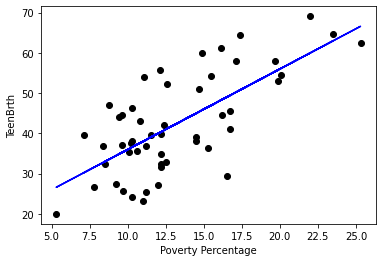

In [92]:
# Now graph the results.
plt.plot(xAxis, yAxis, 'ok')
plt.plot(xAxis, newXValues, color='blue')
plt.xlabel('Poverty Percentage')
plt.ylabel('TeenBrth')
plt.show()

In [93]:
# Display the data here again, because in the next code section predictions will begin.
data.head(n=10)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0
6,Connecticut,9.7,14.1,45.1,4.6,25.8
7,Delaware,10.3,24.7,77.8,3.5,46.3
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1
9,Florida,16.2,23.2,78.4,7.3,44.5


In [109]:
''' Now let's get predictions going. Choosing which attributes to use
    is always an important step for accuracy levels. 
    
    Choosing attributes with ints is necessary because if they're not,
    then conversion to ints must be done.
    
    All columns are used besides Location which is entirely of strings.
    It's taking all the attributes in X (PovPct, Brth15to17, Brth18to19,
    ViolCrime) and the attribute of what is trying to be predicted with
    y (TeenBrth) and with train_test_split to split them into 4 different
    arrays.
    
    x_train is going to be a section of X.
    y_train is going to be a section of y.
    
    Then x & y test to of course test accuracy of the model. The test_size
    argument in train_test_split is reasonably small to maximize on training
    data for that function. The more training the model has done, the better
    it'll perform. Can't train the model on ALL the data, otherwise it'll 
    just memorize what it seen.
'''
X = np.array(data[['PovPct', 'Brth15to17', 'Brth18to19', 'ViolCrime']])
y = np.array(data['TeenBrth'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# Create the model then fit and train it with the fit function.
linModel = linear_model.LinearRegression()
linModel.fit(x_train, y_train)

# The higher the score is, the better it should perform for predictions.
score = linModel.score(x_test, y_test)
print(f'Score is: {score}.')

Score is: 0.998175414967841.


In [110]:
''' Start predictions using the predict function with the model.
    It's going to guess what all the test data is since the model
    was NOT trained on those.
    
    predictions - What the model predicted the value to be.
    
    x_test - This will contain sections of the data. Say in the row
    "New York" (New York is index 32 on the data table). It has 
    "New_York 	16.5 	15.7 	50.1 	8.5 	29.5" so an index 
    in x_test will contain rows in the data.
    
    y_test - The real values in each row the model is trying to predict.
    
    Then loop to print all the data.
'''
predictions = linModel.predict(x_test)

for i in range(len(predictions)):
    print(f'Predicted: {round(predictions[i])}. Test data: {x_test[i]}. Actual value: {round(y_test[i])}.')

Predicted: 53. Test data: [19.9 29.2 87.2  7.9]. Actual value: 53.
Predicted: 23. Test data: [11.  12.5 39.6  3.6]. Actual value: 23.
Predicted: 27. Test data: [12.  11.7 48.7  0.9]. Actual value: 27.
Predicted: 47. Test data: [ 8.8 26.2 79.1  5.8]. Actual value: 47.
Predicted: 53. Test data: [12.6 28.6 89.3  9.4]. Actual value: 52.
Predicted: 36. Test data: [10.1 20.  59.6 11.8]. Actual value: 35.
Predicted: 32. Test data: [12.2 17.2 53.7  6.3]. Actual value: 32.
Predicted: 32. Test data: [12.2 16.4 55.4  1.8]. Actual value: 32.
Predicted: 42. Test data: [16.7 22.6 69.1 11.2]. Actual value: 41.
Predicted: 32. Test data: [ 8.5 15.9 57.1  4.3]. Actual value: 32.
Predicted: 42. Test data: [10.8 21.4 74.2  6.2]. Actual value: 43.
